In [1]:
# Check the version of the Jupyter Notebook
!jupyter notebook --version

7.0.8


In [2]:
%pwd

'/Users/qingjunzhang/Project/fake_news'

In [9]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/qingjunzhang/Project/fake_news


In [7]:
import pandas as pd, numpy as np
import scipy.sparse as sp
from scipy.sparse import save_npz, load_npz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import sklearn
from sklearn.compose import ColumnTransformer
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            make_scorer,
                            roc_curve,
                            auc)
import shap
import time
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
f = pd.read_csv('./original datasets/Fake.csv')
print(f.shape)
print(f.info())
f.head()

(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
f = f[f['text'] != ' ']
f.shape

(22855, 4)

In [7]:
print(f.title.isnull().sum())
print(f.text.isnull().sum())

0
0


In [8]:
print(f.title.duplicated().sum())
print(f.text.duplicated().sum())

5396
5401


In [9]:
f = f.drop_duplicates(subset='text').reset_index(drop=True)
print(f.shape)
f.head()

(17454, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
# check number of duplicated titles
f.title.duplicated().sum()

5

In [11]:
f.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News'],
      dtype=object)

In [12]:
f['date'] = pd.to_datetime(f['date'], format='mixed', errors='coerce')
print(f.date.min())
print(f.date.max())

2015-03-31 00:00:00
2018-02-19 00:00:00


In [13]:
t = pd.read_csv('./original datasets/True.csv')
print(f'Shape of true set is: {t.shape}')
print(t.info())
t.head()

Shape of true set is: (21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
print(t.title.duplicated().sum())
print(t.text.duplicated().sum())

591
225


In [15]:
t = t.drop_duplicates(subset='text').reset_index(drop=True)
print(t.shape)
t.head()

(21192, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
t.title.duplicated().sum()

371

In [17]:
te = t[t['text'] == ' ']
te

,title,text,subject,date
8920,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


In [18]:
t = t.drop(8920)
t.shape

(21191, 4)

In [19]:
t.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

## the values of subject in false and true set have no overlap, this cause data leakage. need to remove subject column.

In [20]:
f = f.drop('subject', axis=1)
t = t.drop('subject', axis=1)

In [21]:
f['label'] = 1
t['label'] = 0

In [22]:
tf = pd.concat([f, t], axis=0).sample(frac=1, random_state=9).reset_index(drop=True)
print(tf.shape)
tf.head()

(38645, 4)


,title,text,date,label
0,Myanmar plays diplomatic card to avert U.N. ce...,"YANGON/SHAMLAPUR, Bangladesh (Reuters) - Myanm...","September 6, 2017",0
1,Armed force claims victory in Libyan migrant s...,TRIPOLI/TUNIS (Reuters) - An armed alliance in...,"October 6, 2017",0
2,The GOP Is Officially DOOMED As Cruz Drops Ou...,Ted Cruz has officially quit the 2016 Republic...,2016-05-03 00:00:00,1
3,Ted Cruz Awkwardly Tries To Say Trump’s Not A...,"During the Republican primaries, the biggest f...",2016-11-27 00:00:00,1
4,WOW! HUNGARY and ISRAEL Just Labeled Hungarian...,Hillary would never have labeled one of her la...,2017-07-15 00:00:00,1


In [23]:
#tf.to_csv('true+false_v2.csv', index=False)

In [24]:
Train, Test = train_test_split(tf, test_size=0.1, random_state=9)
print(f'Train shape: {Train.shape}, Test shape: {Test.shape}')

Train shape: (34780, 4), Test shape: (3865, 4)


In [25]:
# Train.to_csv('Train_r_v2.csv', index=False)
# Test.to_csv('Test_v2.csv', index=False)

In [26]:
Train, Val = train_test_split(Train, test_size=0.15, random_state=9)
print(f'Train shape: {Train.shape}, Validation shape: {Val.shape}')

Train shape: (29563, 4), Validation shape: (5217, 4)


In [27]:
# Train.to_csv('Train_v2.csv', index=False)
# Val.to_csv('Val_v2.csv', index=False)

<Axes: xlabel='label'>

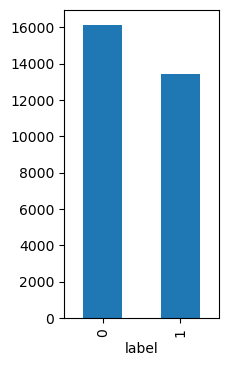

In [28]:
plt.figure(figsize=(2,4))
Train.label.value_counts().plot(kind='bar')

In [29]:
Train['date'] = pd.to_datetime(Train['date'], errors='coerce')
print(Train.date.min())
print(Train.date.max())
Train['date'].dtype

2015-03-31 00:00:00
2018-02-19 00:00:00


dtype('<M8[ns]')

In [30]:
Train_1 = Train.sort_values(by='date').reset_index(drop=True)
Train_1.head()

,title,text,date,label
0,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1
1,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,1
2,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1
3,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1
4,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1


In [55]:
Train_2 = Train[Train['date'].isna()].reset_index(drop=True)
Train_2.shape

(13412, 4)

In [53]:
Train.date.isna().sum()

13412

In [30]:
Train['news'] = Train['title'] + Train['text']
Train = Train.drop(['title', 'text', 'date'], axis=1).reset_index(drop=True)
print(Train.shape)
Train.head()

(29563, 2)


,label,news
0,0,"Concerned by cyber threat, Obama seeks big inc..."
1,1,PLAYBOY “REPORTER” WHINES About Getting No Res...
2,0,Judiciary committee senators won't consider Ob...
3,0,Business leaders say no NAFTA better than bad ...
4,0,Japan PM urges North Korea to refrain from mor...


In [31]:
# Sentiment analysis function

def sentiment(df):
    df['id'] = df.index
    senti = SentimentIntensityAnalyzer()
    results = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        text = row['news']
        myid = row['id']
        results[myid] = senti.polarity_scores(text)
    vaders = pd.DataFrame(results).T
    return vaders

In [32]:
nltk.download('vader_lexicon')

senti = sentiment(Train)
senti.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/qingjunzhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/29563 [00:00<?, ?it/s]

,neg,neu,pos,compound
0,0.103,0.744,0.153,0.9622
1,0.133,0.766,0.101,-0.8990
2,0.078,0.781,0.142,0.7195
3,0.103,0.792,0.106,0.4574
4,0.077,0.893,0.030,-0.9246


In [33]:
# generate named_entities features from news

def named_entity_rec(text):
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    pos_tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    named_entities = []
    for tagged_sentence in pos_tagged_sentences:
        ne_chunked_s = nltk.ne_chunk(tagged_sentence, binary=True)
        entities = [' '.join(w for w, t in elt) for elt in ne_chunked_s if isinstance(elt, nltk.Tree)]
        named_entities.extend(entities)
    return named_entities

In [34]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

start = time.time()

Train['named_entities'] = Train['news'].apply(named_entity_rec)
print(f'Train shape: {Train.shape}')

end = time.time()

print('Time used is: ', round(end/60 - start/60, 2), 'minutes')

Train.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/qingjunzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/qingjunzhang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/qingjunzhang/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/qingjunzhang/nltk_data...
[nltk_data]   Package words is already up-to-date!


Train shape: (29563, 4)
Time used is:  8.6 minutes


,label,news,id,named_entities
0,0,"Concerned by cyber threat, Obama seeks big inc...",0,"[Obama, fundingWASHINGTON, Barack Obama, Congr..."
1,1,PLAYBOY “REPORTER” WHINES About Getting No Res...,1,"[PLAYBOY, Trump, Female, Trump, Playboy, White..."
2,0,Judiciary committee senators won't consider Ob...,2,"[Obama Supreme Court, nomineeWASHINGTON, U.S.,..."
3,0,Business leaders say no NAFTA better than bad ...,3,"[Business, dealMEXICO, CITY, Business, America..."
4,0,Japan PM urges North Korea to refrain from mor...,4,"[Japan PM, North Korea, Japanese, Shinzo Abe, ..."


In [35]:
def text_process(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\W', ' ', text)
    text = re.sub('https?: //\S+ | www\. \S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [36]:
Train['news'] = Train['news'].apply(text_process)

In [37]:
Train = pd.concat([Train, senti], axis=1)
Train = Train.drop('id',axis=1)
print(Train.shape)
Train.head()

(29563, 7)


,label,news,named_entities,neg,neu,pos,compound
0,0,concerned by cyber threat obama seeks big inc...,"[Obama, fundingWASHINGTON, Barack Obama, Congr...",0.103,0.744,0.153,0.9622
1,1,playboy reporter whines about getting no res...,"[PLAYBOY, Trump, Female, Trump, Playboy, White...",0.133,0.766,0.101,-0.8990
2,0,judiciary committee senators won t consider ob...,"[Obama Supreme Court, nomineeWASHINGTON, U.S.,...",0.078,0.781,0.142,0.7195
3,0,business leaders say no nafta better than bad ...,"[Business, dealMEXICO, CITY, Business, America...",0.103,0.792,0.106,0.4574
4,0,japan pm urges north korea to refrain from mor...,"[Japan PM, North Korea, Japanese, Shinzo Abe, ...",0.077,0.893,0.030,-0.9246


In [38]:
Train['named_entities'] = Train['named_entities'].apply(lambda x: ' '.join(x))
Train.head()

,label,news,named_entities,neg,neu,pos,compound
0,0,concerned by cyber threat obama seeks big inc...,Obama fundingWASHINGTON Barack Obama Congress ...,0.103,0.744,0.153,0.9622
1,1,playboy reporter whines about getting no res...,PLAYBOY Trump Female Trump Playboy White House...,0.133,0.766,0.101,-0.8990
2,0,judiciary committee senators won t consider ob...,Obama Supreme Court nomineeWASHINGTON U.S. Maj...,0.078,0.781,0.142,0.7195
3,0,business leaders say no nafta better than bad ...,Business dealMEXICO CITY Business American Fre...,0.103,0.792,0.106,0.4574
4,0,japan pm urges north korea to refrain from mor...,Japan PM North Korea Japanese Shinzo Abe North...,0.077,0.893,0.030,-0.9246


In [39]:
#Train.to_csv('Train_feature_engineer.csv', index=False)

In [40]:
# Define a column transformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('news', TfidfVectorizer(max_features=2500), 'news'),
        ('named_entities', TfidfVectorizer(max_features=2500), 'named_entities'),
        ('num', StandardScaler(), ['neg', 'neu', 'pos', 'compound'])
    ]
)

# Fit and transform the data
X_train = preprocessor.fit_transform(Train)
y_train = Train['label']
print(X_train.shape, y_train.shape)

(29563, 5004) (29563,)


In [42]:
Val['news'] = Val['title'] + Val['text']
Val = Val.drop(['title', 'text', 'date'], axis=1).reset_index(drop=True)
print(Val.shape)

senti_v = sentiment(Val)
Val['named_entities'] = Val['news'].apply(named_entity_rec)
Val['named_entities'] = Val['named_entities'].apply(lambda x: ' '.join(x))
Val['news'] = Val['news'].apply(text_process)
Val = pd.concat([Val, senti_v], axis=1)
Val = Val.drop('id',axis=1)

Val.head()


(5217, 2)


  0%|          | 0/5217 [00:00<?, ?it/s]

,label,news,named_entities,neg,neu,pos,compound
0,1,trump scandal explodes as flynn s own words o...,TrumpScandal Flynn OwnWords ImmunityComeBackTo...,0.112,0.821,0.067,-0.9608
1,1,budget deal quadruples number of unskilled gue...,BUDGET UnskilledGuest HousePaulRyan Obama Amer...,0.039,0.890,0.071,0.5837
2,1,jeff sessions lies through his teeth in openi...,JeffSessions FactsAlabama DonaldTrump Senate S...,0.117,0.793,0.091,-0.9872
3,0,u s strongly opposes iraqi kurdish independ...,U.S. IraqiKurdish UnitedStates IraqiKurds Iraq...,0.000,0.832,0.168,0.9062
4,0,uk pm may wants to agree outline brexit transi...,UKPM British EuropeanUnion Brexit,0.000,0.820,0.180,0.9136


In [43]:
X_val = preprocessor.transform(Val)
y_val = Val['label']
print(X_val.shape, y_val.shape)

(5217, 5004) (5217,)


In [54]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.115533,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.014815,0.011782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Val['text'] = Val['text'].apply(text_process)
# X_val = pd.DataFrame(vectorizer.transform(Val['text']).toarray())
# y_val = Val['label']

### LogisticRegression model.

In [69]:
start = time.time()

model_lrc = LogisticRegression(random_state=99)
model_lrc.fit(X_train, y_train)

y_val_pred_lrc = model_xgb.predict(X_val)
y_val_prob_lrc = model_xgb.predict_proba(X_val)[:, 1]
print(confusion_matrix(y_val, y_val_pred_lrc))

end = time.time()
print('Time used for training is: ', round(end/60 - start/60, 2),'minutes')

[[2879    6]
 [  10 2322]]
Time used for training is:  0.02 minutes


In [15]:
import joblib
joblib.dump(model_lrc, 'model_lrc.model')

NameError: name 'model_lrc' is not defined

In [47]:
start = time.time()

model_rfc = RandomForestClassifier(random_state=99)
model_rfc.fit(X_train, y_train)

end = time.time()
print('Time used for training is: ', round(end/60 - start/60, 2),'minutes')

Time used for training is:  0.29 minutes


In [48]:
y_val_pred = model_rfc.predict(X_val)
y_val_prob = model_rfc.predict_proba(X_val)[:, 1]
confusion_matrix(y_val, y_val_pred)

array([[2872,   13],
       [  13, 2319]])

In [ ]:
joblib.dump(model_rfc, 'model_lrc.model')

In [57]:
start = time.time()

model_xgb = XGBClassifier(random_state=99)
model_xgb.fit(X_train, y_train)

y_val_pred_xgb = model_xgb.predict(X_val)
y_val_prob_xgb = model_xgb.predict_proba(X_val)[:, 1]
print(confusion_matrix(y_val, y_val_pred_xgb))

end = time.time()
print('Time used for training is: ', round(end/60 - start/60, 2),'minutes')

[[2879    6]
 [  10 2322]]
Time used for training is:  0.15 minutes


In [ ]:
joblib.dump(model_xgb, 'model_lrc.model')

## Model explain with shap.

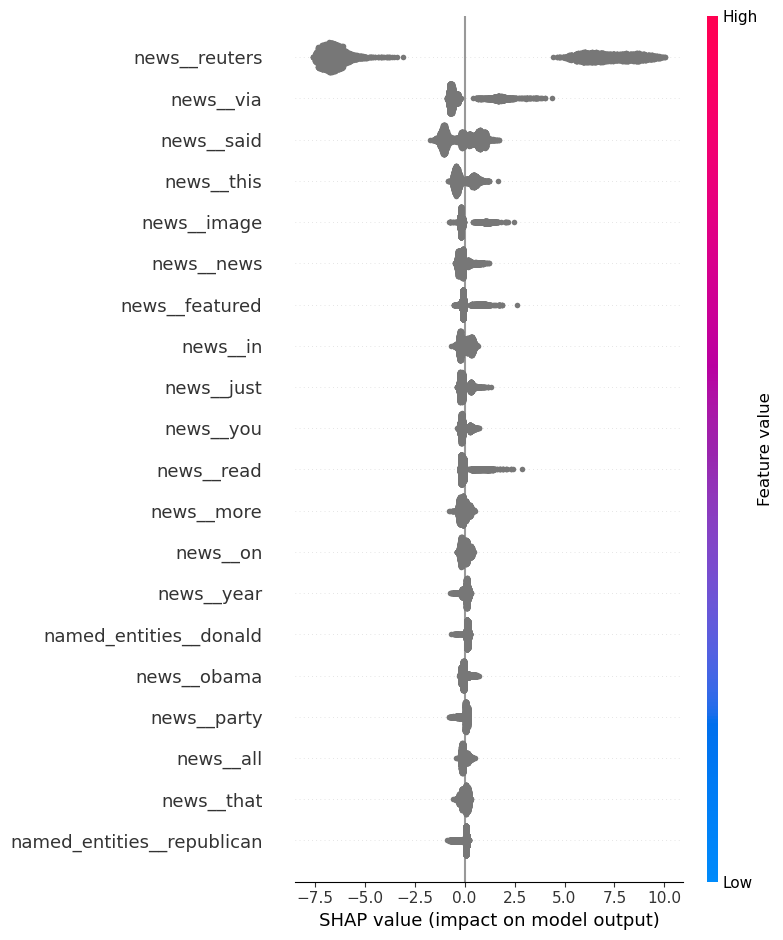

Time to plot is:  0.011 minutes


In [62]:
start = time.time()
explainer = shap.TreeExplainer(model_xgb)
shap_value = explainer.shap_values(X_val)

feature_names = preprocessor.get_feature_names_out()
shap.summary_plot(shap_value, X_val, feature_names=feature_names)

end = time.time()
print('Time to plot is: ', round(end/60 - start/60, 3),'minutes')

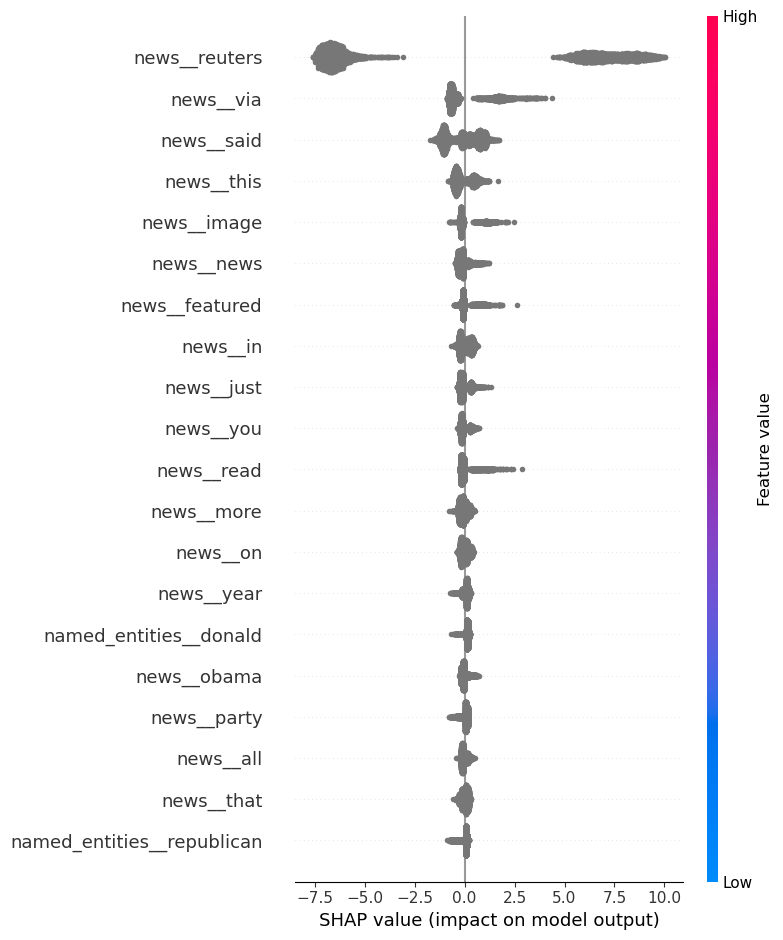

In [71]:
explainer = shap.TreeExplainer(model_xgb)
shap_value = explainer.shap_values(X_val)

feature_names = preprocessor.get_feature_names_out()
shap.summary_plot(shap_value, X_val, feature_names=feature_names, color=plt.get_cmap("coolwarm"))

In [74]:
shap.initjs()  # Initialize JavaScript visualization in Jupyter
shap.force_plot(explainer.expected_value, shap_value[0], X_val.iloc[0])


AttributeError: 'csr_matrix' object has no attribute 'iloc'

## Finall test with Test set.

In [76]:
Test['news'] = Test['title'] + Test['text']
Test = Test.drop(['title', 'text', 'date'], axis=1).reset_index(drop=True)
print(Test.shape)

senti_v = sentiment(Test)
Test['named_entities'] = Test['news'].apply(named_entity_rec)
Test['named_entities'] = Test['named_entities'].apply(lambda x: ' '.join(x))
Test['news'] = Test['news'].apply(text_process)
Test = pd.concat([Test, senti_v], axis=1)
Test = Test.drop('id',axis=1)

X_test = preprocessor.transform(Test)
y_test = Test['label']
print(X_test.shape, y_test.shape)

  0%|          | 0/3865 [00:00<?, ?it/s]

(3865, 5004) (3865,)


In [77]:
start = time.time()
y_test_pred = model_rfc.predict(X_test)
y_test_prob = model_rfc.predict_proba(X_test)
print(confusion_matrix(y_test, y_test_pred))
end = time.time()
print('Time used for predicting is: ', round(end/60 - start/60, 3),'minutes')

[[2150    5]
 [  13 1697]]
Time used for predicting is:  0.003 minutes


In [78]:
start = time.time()
y_test_pred_xgb = model_xgb.predict(X_test)
y_test_prob_xgb = model_xgb.predict_proba(X_test)
print(confusion_matrix(y_test, y_test_pred_xgb))
end = time.time()
print('Time used for predicting is: ', round(end/60 - start/60, 3),'minutes')

[[2154    1]
 [  11 1699]]
Time used for predicting is:  0.0 minutes


In [79]:
start = time.time()
y_test_pred_lrc = model_lrc.predict(X_test)
y_test_prob_lrc = model_lrc.predict_proba(X_test)
print(confusion_matrix(y_test, y_test_pred_lrc))
end = time.time()
print('Time used for predicting is: ', round(end/60 - start/60, 3),'minutes')

[[2134   21]
 [  55 1655]]
Time used for predicting is:  0.0 minutes


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset
df = pd.read_csv('Train_r_v2.csv')

# Assuming 'text' column contains the news and there's a 'label' column for fake/true news
texts = df['text'].values
labels = df['label'].values  # Assuming 1 for fake and 0 for true

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenize the texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to ensure uniform input size
max_sequence_length = max([len(sequence) for sequence in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/5
870/870 [==============================] - 4650s 5s/step - loss: 0.0967 - accuracy: 0.9651 - val_loss: 0.0505 - val_accuracy: 0.9882
Epoch 2/5
870/870 [==============================] - 4553s 5s/step - loss: 0.0485 - accuracy: 0.9860 - val_loss: 0.0420 - val_accuracy: 0.9881
Epoch 3/5
870/870 [==============================] - 4512s 5s/step - loss: 0.0351 - accuracy: 0.9877 - val_loss: 0.0188 - val_accuracy: 0.9958
Epoch 4/5
870/870 [==============================] - 4548s 5s/step - loss: 0.0738 - accuracy: 0.9728 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 5/5
218/218 [==============================] - 105s 479ms/step - loss: 0.0513 - accuracy: 0.9827
Loss: 0.051336586475372314, Accuracy: 0.9827486872673035


In [9]:
# rerun the above cell

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


start = time.time()

# Load your dataset
df = pd.read_csv('Train_r_v2.csv')

# Assuming 'text' column contains the news and there's a 'label' column for fake/true news
texts = df['text'].values
labels = df['label'].values  # Assuming 1 for fake and 0 for true

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenize the texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to ensure uniform input size
max_sequence_length = max([len(sequence) for sequence in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

end = time.time()
print('Time to plot is: ', round(end/60 - start/60, 3),'minutes')

Epoch 1/5
870/870 ━━━━━━━━━━━━━━━━━━━━ 2892s 3s/step - accuracy: 0.9277 - loss: 0.1980 - val_accuracy: 0.9783 - val_loss: 0.0586
Epoch 2/5
870/870 ━━━━━━━━━━━━━━━━━━━━ 5948s 7s/step - accuracy: 0.9768 - loss: 0.0715 - val_accuracy: 0.9925 - val_loss: 0.0284
Epoch 3/5
870/870 ━━━━━━━━━━━━━━━━━━━━ 10082s 12s/step - accuracy: 0.9899 - loss: 0.0364 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 4/5
870/870 ━━━━━━━━━━━━━━━━━━━━ 10899s 13s/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9859 - val_loss: 0.0506
Epoch 5/5
870/870 ━━━━━━━━━━━━━━━━━━━━ 4413s 5s/step - accuracy: 0.9907 - loss: 0.0293 - val_accuracy: 0.9937 - val_loss: 0.0228
218/218 ━━━━━━━━━━━━━━━━━━━━ 80s 368ms/step - accuracy: 0.9936 - loss: 0.0253
Loss: 0.022768232971429825, Accuracy: 0.9936745166778564
Time to plot is:  572.069 minutes


In [6]:
# using pytorch

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Load the dataset
data = pd.read_csv('Train_r_v2.csv')

# Split the dataset into training and test sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Tokenize the text data
tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# Build the vocabulary
train_text = train_data['text'].tolist()
vocab = build_vocab_from_iterator(yield_tokens(train_text), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

# Convert text to numerical tensors
text_pipeline = lambda x: vocab(tokenizer(x))
train_text_encoded = train_data['text'].apply(text_pipeline)
test_text_encoded = test_data['text'].apply(text_pipeline)

# Convert labels to tensors
train_labels = torch.tensor(train_data['label'].values)
test_labels = torch.tensor(test_data['label'].values)

# Create PyTorch datasets
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_text_encoded.values, train_labels)
test_dataset = TensorDataset(test_text_encoded.values, test_labels)

from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Create PyTorch datasets and data loaders
# train_dataset = TensorDataset(X_train, y_train)
# test_dataset = TensorDataset(X_test, y_test)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32)

# Define the Model
class FakeNewsDetector(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FakeNewsDetector, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

# Instantiate the model
input_size = ... # Size of the input tensor (e.g., embedding dimension)
hidden_size = 128
output_size = 1
model = FakeNewsDetector(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(torch.sigmoid(outputs)).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

TypeError: 'int' object is not callable

In [2]:
d = pd.read_csv("true+false_v2.csv")
d.head()

,title,text,date,label
0,Myanmar plays diplomatic card to avert U.N. ce...,"YANGON/SHAMLAPUR, Bangladesh (Reuters) - Myanm...","September 6, 2017",0
1,Armed force claims victory in Libyan migrant s...,TRIPOLI/TUNIS (Reuters) - An armed alliance in...,"October 6, 2017",0
2,The GOP Is Officially DOOMED As Cruz Drops Ou...,Ted Cruz has officially quit the 2016 Republic...,"May 3, 2016",1
3,Ted Cruz Awkwardly Tries To Say Trump’s Not A...,"During the Republican primaries, the biggest f...","November 27, 2016",1
4,WOW! HUNGARY and ISRAEL Just Labeled Hungarian...,Hillary would never have labeled one of her la...,"Jul 15, 2017",1


In [8]:
f = pd.read_csv('Train_feature_engineer.csv')
f.head()

,label,news,named_entities,neg,neu,pos,compound
0,0,concerned by cyber threat obama seeks big inc...,Obama fundingWASHINGTON Barack Obama Congress ...,0.103,0.744,0.153,0.9622
1,1,playboy reporter whines about getting no res...,PLAYBOY Trump Female Trump Playboy White House...,0.133,0.766,0.101,-0.8990
2,0,judiciary committee senators won t consider ob...,Obama Supreme Court nomineeWASHINGTON U.S. Maj...,0.078,0.781,0.142,0.7195
3,0,business leaders say no nafta better than bad ...,Business dealMEXICO CITY Business American Fre...,0.103,0.792,0.106,0.4574
4,0,japan pm urges north korea to refrain from mor...,Japan PM North Korea Japanese Shinzo Abe North...,0.077,0.893,0.030,-0.9246


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Data Preparation
train = pd.read_csv('Train_feature_engineer.csv')
test = pd.read_csv('Test_v2.csv')
# Assuming you have already preprocessed the text data and converted it to tensors


train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = ... # Training data tensors
X_test, y_test = ... # Test data tensors

# Create PyTorch datasets and data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the Model
class FakeNewsDetector(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FakeNewsDetector, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

# Instantiate the model
input_size = ... # Size of the input tensor (e.g., embedding dimension)
hidden_size = 128
output_size = 1
model = FakeNewsDetector(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(torch.sigmoid(outputs)).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

In [6]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchtext.legacy import data

# # Step 1: Data Preprocessing

# # Define the Field for the text data
# text_field = data.Field(tokenize='spacy', preprocessing=lambda x: x.lower(), stop_words='english')

# # Define the Field for the label data (0 or 1)
# label_field = data.Field(sequential=False, use_vocab=False, is_target=True)

# # Load the data
# train_data, test_data = data.TabularDataset.splits(
#     path='path/to/data',
#     train='train.csv',
#     test='test.csv',
#     format='csv',
#     fields={'text': ('text', text_field), 'label': ('label', label_field)},
#     skip_header=True
# )

# # Build the vocabulary for the text data
# text_field.build_vocab(train_data, min_freq=2, vectors="glove.6B.100d")

# # Create iterators for the training and test data
# train_iter, test_iter = data.BucketIterator.splits(
#     (train_data, test_data),
#     batch_size=32,
#     sort_key=lambda x: len(x.text),
#     sort_within_batch=True,
#     device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchtext import data

# # Define the Field for the text data
# text_field = data.Field(tokenize='spacy', preprocessing=lambda x: x.lower(), stop_words='english')

# # Define the Field for the label data (0 or 1)
# label_field = data.Field(sequential=False, use_vocab=False, is_target=True)

# # Load the data
# train_data, test_data = data.TabularDataset.splits(
#     path='path/to/data',
#     train='train.csv',
#     test='test.csv',
#     format='csv',
#     fields={'text': ('text', text_field), 'label': ('label', label_field)},
#     skip_header=True
# )

# # Build the vocabulary for the text data
# text_field.build_vocab(train_data, min_freq=2, vectors="glove.6B.100d")

# # Create iterators for the training and test data
# train_iter, test_iter = data.BucketIterator.splits(
#     (train_data, test_data),
#     batch_size=32,
#     sort_key=lambda x: len(x.text),
#     sort_within_batch=True,
#     device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# )

# # ... (rest of the code remains the same)


import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext import data

# Step 1: Data Preprocessing

# Define the Field for the text data
text_field = data.Field(tokenize='spacy', preprocessing=lambda x: x.lower(), stop_words='english')

# Define the Field for the label data (0 or 1)
label_field = data.Field(sequential=False, use_vocab=False, is_target=True)

# Load the data
train_data, test_data = TabularDataset.splits(
    path='/Users/qingjunzhang/Project/fake news',
    train='Train_feature_engineer.csv',
    test='Test_v2.csv',
    format='csv',
    fields={'text': ('text', text_field), 'label': ('label', label_field)},
    skip_header=True
)

# Build the vocabulary for the text data
text_field.build_vocab(train_data, min_freq=2, vectors="glove.6B.100d")

# Create iterators for the training and test data
train_iter, test_iter = BucketIterator.splits(
    (train_data, test_data),
    batch_size=32,
    sort_key=lambda x: len(x.text),
    sort_within_batch=True,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
)

# Step 2: Define the Model
class FakeNewsDetector(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(FakeNewsDetector, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        output = self.fc(hidden.squeeze(0))
        return output

# Initialize the model
vocab_size = len(text_field.vocab)
embedding_dim = 100
hidden_dim = 256
output_dim = 1
model = FakeNewsDetector(vocab_size, embedding_dim, hidden_dim, output_dim)

# Step 3: Define the Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())

# Step 4: Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch in train_iter:
        text, labels = batch.text, batch.label
        optimizer.zero_grad()
        outputs = model(text)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

# Step 5: Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in test_iter:
        text, labels = batch.text, batch.label
        outputs = model(text)
        predicted = torch.round(torch.sigmoid(outputs)).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

AttributeError: module 'torchtext.data' has no attribute 'Field'

In [7]:
# from Gemini

import torch
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Load your dataset here (replace 'data.csv' with your actual file)
data = pd.read_csv('Train_feature_engineer.csv')

# Split data into features (text) and labels
text = data['news']
labels = data['label']

# Define text cleaning function
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  stop_words = set(stopwords.words('english'))
  text = [w for w in text.split() if w not in stop_words]
  # Optional stemming
  # stemmer = PorterStemmer()
  # text = [stemmer.stem(word) for word in text]
  return text

# Apply cleaning to text data
text = [clean_text(t) for t in text]

# Define vocabulary size (adjust based on your data)
vocab_size = 10000

# Create word-to-index dictionary
word_to_index = {'<PAD>': 0, '<UNK>': 1}
i = 2
for sentence in text:
  for word in sentence:
    if word not in word_to_index:
      word_to_index[word] = i
      i += 1

# Truncate or pad sequences to a fixed length (adjust max_len)
max_len = 200

# Convert text to sequences of indices
text_sequences = []
for sentence in text:
  seq = [word_to_index.get(word, word_to_index['<UNK>']) for word in sentence]
  if len(seq) > max_len:
    seq = seq[:max_len]
  elif len(seq) < max_len:
    seq.extend([word_to_index['<PAD>']] * (max_len - len(seq)))
  text_sequences.append(seq)

# Convert data to tensors
text_tensor = torch.tensor(text_sequences)
labels_tensor = torch.tensor(labels)

# Split data into training and validation sets (adjust test_size)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(text_tensor, labels_tensor, test_size=0.2)

# Create datasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create dataloaders (adjust batch_size)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the Neural Network Model
class RNNModel(torch.nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim):
    super(RNNModel, self).__init__()
    self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
    self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)
    self.fc = torch.nn.Linear(hidden_dim, 1)

  def forward(self, x):
    embedded = self.embedding(x)
    _, (hidden, _) = self.lstm(embedded)
    output = self.fc(hidden[-1])
    return output

# Define training parameters
model = RNNModel(vocab_size, 128, 64)  # Adjust embedding_dim and hidden_dim
criterion = torch.nn.BCELoss()  # Binary Cross Entropy loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 5  # Adjust number of epochs
for epoch in range(num_epochs):
  # Train loop
  for i, (texts, labels) in enumerate(train_dataloader):
    # Forward pass
    outputs = model(texts)
    loss = criterion(outputs, labels.float())

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress (optional)
    if i % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

  # Validation loop
  with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    correct = 0
    for texts, labels in val_dataloader:
      outputs = model(texts)
      val_loss += criterion(outputs, labels.float())

      # Calculate accuracy (example using sigmoid activation)
      predictions = (torch.sigmoid(outputs) > 0.5).float()
      correct += (predictions == labels).sum().item()

    val_loss /= len(val_dataset)
    accuracy = correct / len(val_dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}] - Val Loss: {val_loss:.4f}  Val Accuracy: {accuracy:.4f}')

    model.train()  # Set model back to training mode

# Save the trained model (optional)
torch.save(model.state_dict(), 'model.pt')


IndexError: index out of range in self

In [12]:
torch.__version__

'2.2.2'

## Using LLM to do prediction.

In [1]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset
df = pd.read_csv("true+false_v2.csv")
texts = df['text'].tolist()  # Your news texts
labels = df['label'].tolist()  # Your labels, 0 for true, 1 for fake

# Split your dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=.2)

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Tokenize the text for GPT-2
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# Convert data into a format GPT-2 understands
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)

# Load the pre-trained GPT-2 model
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=4,  
    per_device_eval_batch_size=4,   
    warmup_steps=500,                
    weight_decay=0.01,               
    logging_dir='./logs',            
    logging_steps=10,
    no_cuda=True
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/qingjunzhang/Anaconda3/anaconda3/lib/python3.11/site-packages/transformers/training_args.py:1453: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


IndexError: index out of range in self

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
import torch

# Assuming df is your DataFrame with 'text' and 'label'
df = pd.read_csv("true+false_v2.csv")  # load your dataset

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add a padding token to tokenizer and model
# pad_token = tokenizer.eos_token  # GPT-2 uses the EOS token as padding token, you could also choose another.
# tokenizer.add_special_tokens({'pad_token': pad_token})


# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Tokenization function
def tokenize_data(df):
    return tokenizer(df['text'].tolist(), max_length=512, truncation=True, padding="max_length", return_tensors="pt")

# Tokenize the data
train_encodings = tokenize_data(train_df)
val_encodings = tokenize_data(val_df)

# Create torch dataset
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_df['label'].tolist())
val_dataset = NewsDataset(val_encodings, val_df['label'].tolist())

# Load the GPT-2 model
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)
model.resize_token_embeddings(len(tokenizer))

def tokenize_data(df, tokenizer):
    return tokenizer(df['text'].tolist(), truncation=True, padding=True, max_length=512, return_tensors="pt")

train_encodings = tokenize_data(train_df, tokenizer)
val_encodings = tokenize_data(val_df, tokenizer)


# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/yr/ndz1gfj560xf43hlb5mq2dz40000gn/T/ipykernel_13303/1736357883.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


AssertionError: Cannot handle batch sizes > 1 if no padding token is defined.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from tqdm import tqdm

# Load dataset
# Assuming you have a CSV file containing your dataset with two columns: 'text' and 'label'
data = pd.read_csv('true+false_v2.csv')

# Tokenize text using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize and encode text data
input_ids = []
attention_masks = []

for text in data['text']:
    encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens = True,
                        max_length = 256,
                        padding = 'max_length',
                        truncation=True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(data['label'].values)

# Split dataset into train and test sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, 
                                                            random_state=2021, test_size=0.2)
train_masks, val_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2021, test_size=0.2)

# Create DataLoader for training and validation sets
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels=2, 
    output_attentions=False,
    output_hidden_states=False
)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set hyperparameters
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Train BERT model
epochs = 3
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in tqdm(train_dataloader, desc="Training"):
        batch = tuple(t.to(device) for t in batch)
        inputs = {"input_ids": batch[0], "attention_mask": batch[1], "labels": batch[2]}
        model.zero_grad()        
        outputs = model(**inputs)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")

# Evaluate BERT model
model.eval()
total_eval_accuracy = 0
for batch in tqdm(val_dataloader, desc="Evaluation"):
    batch = tuple(t.to(device) for t in batch)
    inputs = {"input_ids": batch[0], "attention_mask": batch[1], "labels": batch[2]}
    with torch.no_grad():        
        outputs = model(**inputs)
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = inputs['labels'].cpu().numpy()
    total_eval_accuracy += np.sum(np.argmax(logits, axis=1) == label_ids)
avg_val_accuracy = total_eval_accuracy / len(val_data)
print(f"Validation Accuracy: {avg_val_accuracy}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 967/967 [4:10:43<00:00, 15.56s/it]


Average training loss: 0.015468771471871296


Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 967/967 [4:09:43<00:00, 15.49s/it]


Average training loss: 0.0024917941166704614


Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 967/967 [4:31:59<00:00, 16.88s/it]


Average training loss: 0.0005098719214001415


Evaluation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [16:27<00:00,  4.08s/it]

Validation Accuracy: 0.9998706171561651


In [87]:
import joblib
joblib.dump(model, 'fake_news_Bert_model.model')

['fake_news_Bert_model.model']

In [88]:
test_v1 = pd.read_csv('test_v1.csv')
test_v1.head()

,title,text,subject,date,label
0,CONSERVATIVE FIREBRAND ANN COULTER DESTROYS De...,There are some people you probably shouldn t c...,politics,"Jul 16, 2017",1
1,Exclusive: Trump administration eyes hardening...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 20, 2017",0
2,MUSLIM ACTIVISTS LAUNCH VOTER REGISTRATION DRI...,Who would ve guessed? A coalition of U.S.-base...,left-news,"Dec 23, 2015",1
3,WORKPLACE MICROAGGRESSION: ISIS Yells “Alluha ...,Obviously not the smartest cowards in the dese...,left-news,"Mar 25, 2016",1
4,Kuwait says GCC to keep operating despite Qata...,DUBAI (Reuters) - Kuwait s deputy foreign mini...,worldnews,"December 27, 2017",0


In [94]:
test = test_v1['text']
test[0]

'There are some people you probably shouldn t cross. Donald Trump is one, and conservative author and political analyst Ann Coulter is the other one Conservative columnist Ann Coulter flew into a fit of fury Saturday after Delta Airlines booted her from her reserved  Comfort+  seat   which comes with 3 additional inches of legroom   and gave it to another passenger.In a two-hour tweeting tantrum,she quoted her exchange with a flight attendant:  Why are you taking me out of the extra room seat I specifically booked?  she asked.Their answer, she said, was  I don t know. Before Coulter posted a picture of the woman Delta gave her extra-legroom reserved seat to, she tweeted this:Suckiest @Delta moved me from my PRE-BOOKED SEAT & gave it to some woman, not elderly, child, or sick. I have pictures so don t lie, @Delta!  Ann Coulter (@AnnCoulter) July 16, 2017But at least @Delta was nice @ it, summarily snatching my ticket from my hand & ordering me to move w/o explanation, compensation or ap

In [90]:
y_pred = model.predict(test['text'])
y_pred

AttributeError: 'BertForSequenceClassification' object has no attribute 'predict'

In [108]:
input_ids = tokenizer.encode(test, max_length = 256, add_special_tokens=True, return_tensors='pt')
with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()
    
def predict_fake_news(text):
    input_ids = tokenizer.encode(test, add_special_tokens=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()
    return prediction

test['prediction'] = test.apply(predict_fake_news)

ValueError: Input 0       There are some people you probably shouldn t c...
1       WASHINGTON (Reuters) - President Donald Trump’...
2       Who would ve guessed? A coalition of U.S.-base...
3       Obviously not the smartest cowards in the dese...
4       DUBAI (Reuters) - Kuwait s deputy foreign mini...
                              ...                        
5971    WASHINGTON (Reuters) - Incoming U.S. Senate De...
5972    On Wednesday night s episode of Late Night, ho...
5973    Anila Ali was born in Karachi, Pakistan, and s...
5974    WASHINGTON (Reuters) - A Republican-controlled...
5975    JOHANNESBURG (Reuters) - South Africa s ruling...
Name: text, Length: 5976, dtype: object is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [101]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the DataFrame containing the text data
# Assuming df is your DataFrame containing the 'text' column
# Make sure to preprocess the text column (e.g., remove special characters, convert to lowercase) before using it
# df = ...

# Load the trained BERT model
# model_path = 'fake_news_Bert_model.model'  # Replace with the path to your trained model
# model = BertForSequenceClassification.from_pretrained(model_path)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define a function to preprocess text and make predictions
def predict_fake_news(text):
    # Tokenize and encode the text using the BERT tokenizer
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    
    # Make predictions using the trained model
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the predicted probabilities
    probabilities = torch.softmax(outputs.logits, dim=1)
    
    # Get the predicted label (0 for true news, 1 for fake news)
    predicted_label = torch.argmax(probabilities, dim=1).item()
    
    return predicted_label, probabilities[:, 1].item()  # Return the predicted label and the probability of being fake news

# Apply the predict_fake_news function to each row in the DataFrame
test['predicted_label'], text['fake_probability'] = zip(*test.apply(predict_fake_news))

# Print the DataFrame with the predicted labels and probabilities
print(test)


KeyboardInterrupt: 

In [102]:
df = pd.read_csv('Train_v2.csv', nrows=2000)

In [103]:
df.head()

,title,text,date,label
0,"Concerned by cyber threat, Obama seeks big inc...",WASHINGTON (Reuters) - President Barack Obama ...,"February 9, 2016",0
1,PLAYBOY “REPORTER” WHINES About Getting No Res...,Only a liberal man who works for a magazine ...,"Jun 29, 2017",1
2,Judiciary committee senators won't consider Ob...,WASHINGTON (Reuters) - Republicans on the U.S....,"February 23, 2016",0
3,Business leaders say no NAFTA better than bad ...,MEXICO CITY (Reuters) - Business leaders atten...,"October 12, 2017",0
4,Japan PM urges North Korea to refrain from mor...,TOKYO (Reuters) - Japanese Prime Minister Shin...,"April 17, 2017",0


In [104]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create a function to tokenize and encode the text data
def encode_data(text, label):
    encoding = tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors='pt')
    encoding['labels'] = label
    return encoding

# Tokenize and encode the data
encoded_data = df.apply(lambda row: encode_data(row['text'], row['label']), axis=1, result_type='expand')

# Split the data into train and validation sets
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(encoded_data, test_size=0.2)

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
)

# Train the model
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
# Load the trained model
model = BertForSequenceClassification.from_pretrained('./results')

# Load the new DataFrame
new_df = pd.read_csv('new_data.csv')

# Tokenize and encode the new data
new_encoded_data = new_df['text'].apply(lambda text: tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors='pt'))

# Make predictions
predictions = []
for data in new_encoded_data:
    with torch.no_grad():
        outputs = model(**data)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()
        predictions.append(prediction)

# Add the predictions to the new DataFrame
new_df['prediction'] = predictions

In [2]:
import joblib
joblib.dump(model, 'fake_news_neural_network_model.model')

['fake_news_neural_network_model.model']

In [3]:
new_df = pd.read_csv('Test_v2.csv')

# Assuming new_df is your new DataFrame with the 'text' column
new_texts = new_df['text'].values

# Tokenize the texts
new_sequences = tokenizer.texts_to_sequences(new_texts)

# Pad the sequences
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Predicting the labels for new data
predictions = model.predict(new_padded_sequences)

# Convert probabilities to binary labels based on a threshold (e.g., 0.5)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Add the predicted labels to the DataFrame
new_df['predicted_label'] = predicted_labels

# If needed, map numerical labels back to string labels
label_mapping = {0: 'True', 1: 'Fake'}
new_df['predicted_label'] = new_df['predicted_label'].map(label_mapping)


121/121 [==============================] - 60s 491ms/step


In [4]:
new_df.head()

,title,text,date,label,predicted_label
0,WATCH: Hillary Exposes The GOP’s Abortion Sec...,Republicans and religious conservatives made a...,"April 1, 2016",1,Fake
1,President Obama Arrives in Cuba,USA TODAYHAVANA The wheels of Air Force One ...,"March 21, 2016",1,Fake
2,Boiler Room EP #85.5 – Who’s Watching The Watc...,Tune in to the Alternate Current Radio Network...,"November 30, 2016",1,Fake
3,Supreme Court rejects union appeal over Trump ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,"May 31, 2016",0,True
4,Exclusive: Grand jury subpoenas issued in rela...,NEW YORK (Reuters) - Grand jury subpoenas have...,"August 3, 2017",0,True


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

<Axes: >

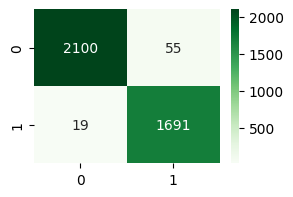

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(new_df.label, predicted_labels), annot=True, fmt='d', cmap='Greens')

In [23]:
print(classification_report(new_df.label, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2155
           1       0.97      0.99      0.98      1710

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



In [27]:
import mxnet as mx
from mxnet import gluon, autograd, nd
from mxnet.gluon import nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load and preprocess data
df = pd.read_csv('Train_r_v2.csv')
texts = df['text'].values
labels = df['label'].values  # Assuming 'label' column exists with 0 for real and 1 for fake

# Convert text to vectors
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)
y = labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to MXNet NDArray
X_train_nd = mx.nd.array(X_train.toarray())
y_train_nd = mx.nd.array(y_train)
X_test_nd = mx.nd.array(X_test.toarray())
y_test_nd = mx.nd.array(y_test)

# Define the model
class Net(gluon.Block):
    def __init__(self, **kwargs):
        super(Net, self).__init__(**kwargs)
        with self.name_scope():
            self.fc1 = nn.Dense(512)
            self.fc2 = nn.Dense(256)
            self.fc3 = nn.Dense(1)  # Binary classification

    def forward(self, x):
        x = nd.relu(self.fc1(x))
        x = nd.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.initialize(mx.init.Xavier())

# Define loss and trainer
loss_function = gluon.loss.SigmoidBCELoss()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': 0.001})

# Training loop
epochs = 10
batch_size = 64
for epoch in range(epochs):
    with autograd.record():
        output = net(X_train_nd)
        loss = loss_function(output, y_train_nd)
    loss.backward()
    trainer.step(batch_size)
    print(f'Epoch {epoch + 1}, Loss: {loss.mean().asscalar()}')

# Evaluate the model
accuracy = mx.metric.Accuracy()
predictions = net(X_test_nd)
predictions = predictions.round()
accuracy.update(preds=predictions, labels=y_test_nd)
print("Accuracy:", accuracy.get()[1])


OSError: dlopen(/Users/qingjunzhang/anaconda3/lib/python3.11/site-packages/mxnet/libmxnet.so, 0x0006): tried: '/Users/qingjunzhang/anaconda3/lib/python3.11/site-packages/mxnet/libmxnet.so' (not a mach-o file), '/System/Volumes/Preboot/Cryptexes/OS/Users/qingjunzhang/anaconda3/lib/python3.11/site-packages/mxnet/libmxnet.so' (no such file), '/Users/qingjunzhang/anaconda3/lib/python3.11/site-packages/mxnet/libmxnet.so' (not a mach-o file)

In [26]:
pip install gluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.6/126.6 kB 904.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pbr>=1.8 from https://files.pythonhosted.org/packages/64/dd/171c9fb653591cf265bcc89c436eec75c9bde3dec921cc236fa71e5698df/pbr-6.0.0-py2.py3-none-any.whl.metadata
  Using cached pbr-6.0.0-py2.py3-none-any.whl.metadata (1.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.6 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for oslo.db>=4.15.0 from https://files.pythonhosted.org/packages/84/c9/2d2eb4822708d6b92e0743762020f9ec26d8674ef7ce7a92332c4a50c6ca/oslo.db-15.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.versionedobjects>=1.17.0 from https://files.pythonhosted.org/packages/65/a7/fa3f8b7196f5295b3603c0e472e37d53c6cd8f75979e3c26d1fdcdd0b2a0/oslo.versionedobjects-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency informati

  Obtaining dependency information for oslo.serialization!=2.19.1,>=2.18.0 from https://files.pythonhosted.org/packages/70/5f/80eb88d4590cc23cd68e05730ee9be51fc1fc83121b8227e0ff5d29bce65/oslo.serialization-5.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for pycadf!=2.0.0,>=1.1.0 from https://files.pythonhosted.org/packages/86/ce/24a9bae050dd327ae46baaf48f5fc3946177fa438280ef10aadff17eecfe/pycadf-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for python-keystoneclient>=3.20.0 from https://files.pythonhosted.org/packages/22/d4/ed2d06aff0a9e8405d3774617f93c45e1a6775dee71303c8835c7deab7b5/python_keystoneclient-5.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for debtcollector>=1.2.0 from https://files.pythonhosted.org/packages/9c/ca/863ed8fa66d6f986de6ad7feccc5df96e37400845b1eeb29889a70feea99/debtcollector-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for netaddr>=0.7.18 from https://files.pythonhosted.org/packag

  Obtaining dependency information for oslo.db>=4.15.0 from https://files.pythonhosted.org/packages/68/79/3fb9d2c0478696dc047503d81f9d60d740ab7908e877f3d601d5caa8c5e4/oslo.db-8.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.db>=4.15.0 from https://files.pythonhosted.org/packages/3c/cd/dd4bbb0d6206bd4ad25fe2adf1e9b700729a2a1bbc16921aa66180ededa8/oslo.db-8.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.db>=4.15.0 from https://files.pythonhosted.org/packages/9e/63/3eff79eaf70a2939fb866784d5c70ac4a0764a011918873b572301aa7b4c/oslo.db-8.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.db>=4.15.0 from https://files.pythonhosted.org/packages/42/8c/f22a08db04ac94d7ae844e3578f1293c8dc92ec87c65f8327f77fd83cb87/oslo.db-8.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.db>=4.15.0 from https://files.pythonhosted.org/packages/8f/64/74430a45a55f9e29e95607a6be63e011bfb57ebd02d5ba993aa2016d159c/oslo.

  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/34/47/95d8f99c9f4a57079dfbcff5e023c5d81bde092d1c2354156340a56b3a1a/alembic-1.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/a2/8b/46919127496036c8e990b2b236454a0d8655fd46e1df2fd35610a9cbc842/alembic-1.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/ab/7d/b572fc6a51bc430b1fa0ef59591db32b14105093324d472eed8ea296d2df/alembic-1.11.3-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/34/fe/eebb260c86c71d9ed861aa1434fc50601df657425b18329994af8c0bd789/alembic-1.11.2-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/11/00/46a4f66ad54c661350a1cd5daae4b4ab2232486c55635ee12ff12958b03f/alembi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.8 MB/s eta 0:00:00a 0:00:01m
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/fe/69/1c35b66df7b1dc197e7dc170b546b0496ebb6e32710d36461becdb6f01ba/alembic-1.6.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/c8/3c/1e089b6a4b73481239615a10629acfb56c5625f0dde332932bac6efea972/alembic-1.6.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/72/a4/97eb6273839655cac14947986fa7a5935350fcfd4fff872e9654264c82d8/alembic-1.5.8-py2.py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=0.9.6 from https://files.pythonhosted.org/packages/f7/29/ed5c134aba874053859ba3e8d4705b4a5c1b66156deabc26cbe643e83f2e/alembic-1.5.7-py2.py3-none-any.whl.metadata
  Obtaining dependency informat

  Obtaining dependency information for futurist>=1.2.0 from https://files.pythonhosted.org/packages/ad/2b/dcdb2dfdc61676ac25676f10f71c9bba77bf81227f3e73f5c678462bffaf/futurist-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for kombu>=4.6.6 from https://files.pythonhosted.org/packages/f7/88/daca086d72832c74a7e239558ad484644c8cda0b9ae8a690f247bf13c268/kombu-5.3.5-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.metrics>=0.2.1 from https://files.pythonhosted.org/packages/be/49/c218ac6392ac4a9feb7082b58d52728ac49f72436fd0bc57d8dd6397ea53/oslo.metrics-0.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for oslo.service!=1.28.1,>=1.24.0 from https://files.pythonhosted.org/packages/39/1f/3b9c21e0cf1f9c638d0c8dfef35bc6101d2f59f22dbc5454eb0e0b4d19a7/oslo.service-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for Tempita>=0.4 from https://files.pythonhosted.org/packages/46/5b/2ad80b580134a160e84b9aac0d136df3d77d5ccd45cd3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.7/258.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.0.28 requires SQLAlchemy<3,>=1.4, but you have sqlalchemy 1.0.19 which is incompatible.
langchain 0.1.12 requires SQLAlchemy<3,>=1.4, but you have sqlalchemy 1.0.19 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# new pipeline 10/17/24 from chatgpt

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TextClassificationPipeline
from datasets import Dataset

# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your dataset
df = pd.read_csv('Train_r_v2.csv')  # Replace with the actual path to your dataset

# Combine 'title' and 'text' into a single 'content' column
# df['content'] = df['title'] + ' ' + df['text']

# Ensure 'label' is of integer type
df['label'] = df['label'].astype(int)

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df[['content', 'label']], test_size=0.2, random_state=42)

# Convert pandas DataFrames to HuggingFace Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# Load the pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['content'], truncation=True, padding='max_length', max_length=512)

# Apply the tokenizer to the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Set the format of the datasets to PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=3,              # Total number of training epochs
    per_device_train_batch_size=8,   # Batch size per device during training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Fine-tune the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()
print(f"Evaluation results: {eval_result}")

# Create a text classification pipeline using the fine-tuned model
pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, framework='pt', device=0 if torch.cuda.is_available() else -1)

# Function to predict if a news article is fake or real
def predict_fake_news(title, text):
    content = title + ' ' + text
    prediction = pipeline(content)
    label = prediction[0]['label']
    score = prediction[0]['score']
    return {'label': label, 'score': score}

# Example usage
sample_title = "Breaking News: AI Revolutionizes Tech Industry"
sample_text = "In a groundbreaking development, artificial intelligence is set to transform the technology sector..."
prediction = predict_fake_news(sample_title, sample_text)
print(f"Prediction: {prediction}")


In [ ]:
# pipeline from nvida lama-3.1-nemotron-70b 10/17/24

import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Load your dataset
def load_dataset(path):
    return pd.read_csv(path)

# Custom dataset class for our news data
class NewsDataset(Dataset):
    def __init__(self, news_df, tokenizer, max_len):
        self.df = news_df
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        title = self.df.iloc[idx, 0]
        text = self.df.iloc[idx, 1]
        label = self.df.iloc[idx, 2]

        # Combine title and text as BERT expects a single sequence
        combined_text = title + " " + text

        encoding = self.tokenizer.encode_plus(
            combined_text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Set hyperparameters
MAX_LEN = 512
BATCH_SIZE = 16
EPOCHS = 5

# Load dataset
df = load_dataset('your_news_dataset.csv')

# Split data into training and validation sets
train_text, val_text, train_labels, val_labels = train_test_split(df[['title', 'text']], df['label'], random_state=42, test_size=0.2, stratify=df['label'])

# Create DataFrames for training and validation
train_df = pd.concat([train_text, train_labels], axis=1)
val_df = pd.concat([val_text, val_labels], axis=1)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create dataset instances
train_dataset = NewsDataset(train_df, tokenizer, max_len=MAX_LEN)
val_dataset = NewsDataset(val_df, tokenizer, max_len=MAX_LEN)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Load pre-trained BERT model and create a custom classification layer on top
class FakeNewsClassifier(torch.nn.Module):
    def __init__(self):
        super(FakeNewsClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = torch.nn.Dropout(p=0.3)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 2)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids, attention_mask)
        pooled_output = self.dropout(pooled_output)
        outputs = self.classifier(pooled_output)
        return outputs

model = FakeNewsClassifier()

# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

    model.eval()
    predictions = []
    labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device


In [42]:
l=[1,2,3,4]
x=list(map(lambda x: x**2, l))
x

[1, 4, 9, 16]

In [45]:
def f(v, vs):
    v=1
    vs[0]=44
a=3
arr=[1,2,3]
f(a,arr)
print(a,arr[0])

3 44


In [46]:
class foo():
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2

    def __add__(self, other):
        return self.x1 + other.x1

    def __sub__(self, other):
        return self.x2 - other.x2

inst1 = foo(1, 3)
inst2 = foo(3, 2)
print(inst1 + inst2)

4


In [47]:
a, b = [3, 4]
res = []
for num in range(0, a*100):
    res.append(b + num)

print(res)
# Output: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ..., 303]

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2

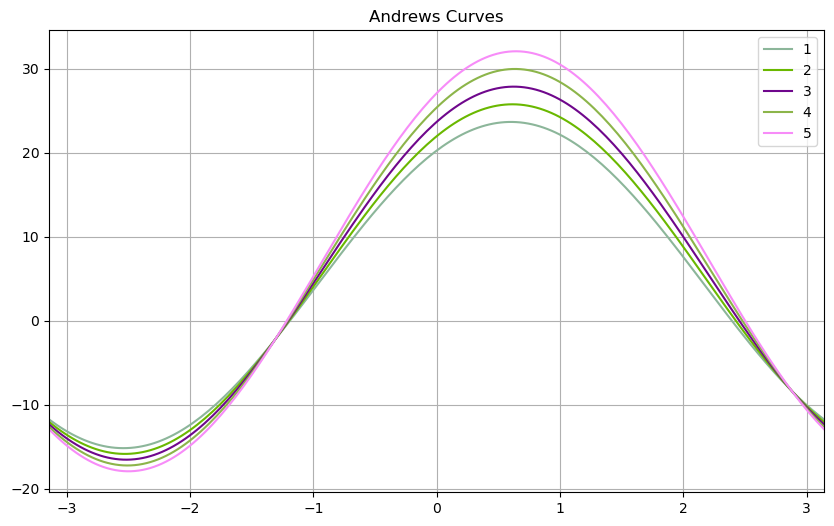

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [6, 7, 8, 9, 10],
        'C': [11, 12, 13, 14, 15],
        'D': [16, 17, 18, 19, 20]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
pd.plotting.andrews_curves(df, 'A')
plt.title('Andrews Curves')
plt.show()

In [10]:
import pulp

# Define the problem
prob = pulp.LpProblem("Sales_Incentive_Optimization", pulp.LpMaximize)

# Data
salespeople = ['A', 'B', 'C']
prizes = ['Prize1', 'Prize2', 'Prize3']
sales_performance = {'A': 100, 'B': 80, 'C': 90}  # Example performance scores
costs = {'Prize1': 50, 'Prize2': 40, 'Prize3': 30}
budget = 100

# Decision variables
x = pulp.LpVariable.dicts("Prize", (salespeople, prizes), cat='Binary')

# Objective function: Maximize total sales performance
prob += pulp.lpSum([sales_performance[i] * x[i][j] for i in salespeople for j in prizes])

# Constraints
# Each salesperson can receive at most one prize
for i in salespeople:
    prob += pulp.lpSum([x[i][j] for j in prizes]) <= 1

# Total cost should not exceed the budget
prob += pulp.lpSum([costs[j] * x[i][j] for i in salespeople for j in prizes]) <= budget

# Solve the problem
prob.solve()

# Print results
for i in salespeople:
    for j in prizes:
        if pulp.value(x[i][j]) == 1:
            print(f"Salesperson {i} receives {j}")

print(f"Total Performance: {pulp.value(prob.objective)}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/qingjunzhang/Anaconda3/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yr/ndz1gfj560xf43hlb5mq2dz40000gn/T/f949786f38db40f08a5aa0e09983cb15-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/yr/ndz1gfj560xf43hlb5mq2dz40000gn/T/f949786f38db40f08a5aa0e09983cb15-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 55 RHS
At line 60 BOUNDS
At line 70 ENDATA
Problem MODEL has 4 rows, 9 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 270 - 0.00 seconds
Cgl0004I processed model has 4 rows, 9 columns (9 integer (9 of which binary)) and 18 elements
Cutoff increment increased from 1e-05 to 9.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -270
Cbc0038I Before m

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Sample data
data = pd.DataFrame({
    'treatment': np.random.binomial(1, 0.5, 100),
    'outcome': np.random.normal(0, 1, 100),
    'covariate1': np.random.normal(0, 1, 100),
    'covariate2': np.random.normal(0, 1, 100)
})

# Step 1: Estimate propensity scores
covariates = ['covariate1', 'covariate2']
X = data[covariates]
y = data['treatment']

model = LogisticRegression()
model.fit(X, y)
data['propensity_score'] = model.predict_proba(X)[:, 1]

# Step 2: Match treated and control units
treated = data[data['treatment'] == 1]
control = data[data['treatment'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

matched_control = control.iloc[indices.flatten()]

# Step 3: Estimate treatment effect
treated_outcomes = treated['outcome'].values
control_outcomes = matched_control['outcome'].values

treatment_effect = np.mean(treated_outcomes - control_outcomes)
print(f"Estimated Treatment Effect: {treatment_effect}")


Estimated Treatment Effect: 0.06619183974001754


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor

# Sample data
np.random.seed(123)
n_samples = 1000
X = np.random.normal(0, 1, (n_samples, 5))  # Covariates
treatment = np.random.binomial(1, 0.5, n_samples)  # Binary treatment
noise = np.random.normal(0, 1, n_samples)
outcome = 2 * treatment + 0.5 * X[:, 0] - 0.2 * X[:, 1] + noise  # Outcome

data = pd.DataFrame(X, columns=[f'covariate_{i}' for i in range(X.shape[1])])
data['treatment'] = treatment
data['outcome'] = outcome

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Define the Causal Forest model
est = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    discrete_treatment=True,
    cv=3,
    random_state=123
)

# Fit the model
est.fit(Y=train['outcome'], T=train['treatment'], X=train.drop(columns=['treatment', 'outcome']))

# Estimate treatment effects
te_preds = est.effect(test.drop(columns=['treatment', 'outcome']))

# Add the treatment effects to the test DataFrame
test['treatment_effect'] = te_preds

# Print some of the estimated treatment effects
print(test[['treatment_effect']].head())

# Summary statistics of the treatment effects
print("Mean Estimated Treatment Effect:", test['treatment_effect'].mean())
print("Standard Deviation of Treatment Effect:", test['treatment_effect'].std())


ModuleNotFoundError: No module named 'econml'

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample data: price and quantity demanded
data = pd.DataFrame({
    'price': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
    'quantity': [100, 90, 80, 70, 60, 50, 45, 40, 35, 30]
})

# Log-transform the data to linearize the relationship
data['log_price'] = np.log(data['price'])
data['log_quantity'] = np.log(data['quantity'])

# Split the data into training and testing sets
X = data[['log_price']]
y = data['log_quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficient for log_price
elasticity = model.coef_[0]
print(f'Price Elasticity: {elasticity}')

# Predict quantity demanded
y_pred = model.predict(X_test)


Price Elasticity: -1.1776009373884881


In [19]:
pip install pymc3 arviz

DEPRECATION: Loading egg at /Users/qingjunzhang/Anaconda3/anaconda3/lib/python3.11/site-packages/pymagnitude-0.1.143-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 29.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.7 MB/s eta 0:00:0000:01
   

In [20]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
treatment = np.random.binomial(1, 0.5, n_samples)
noise = np.random.normal(0, 1, n_samples)
outcome = 2 * treatment + 0.5 * X1 - 0.2 * X2 + noise

data = pd.DataFrame({'X1': X1, 'X2': X2, 'treatment': treatment, 'outcome': outcome})

# Define the Bayesian model
with pm.Model() as model:
    # Priors for coefficients
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta_treatment = pm.Normal('beta_treatment', mu=0, sigma=1)
    beta_X1 = pm.Normal('beta_X1', mu=0, sigma=1)
    beta_X2 = pm.Normal('beta_X2', mu=0, sigma=1)
    
    # Linear model for the mean outcome
    mu = (alpha + beta_treatment * data['treatment'] +
          beta_X1 * data['X1'] +
          beta_X2 * data['X2'])
    
    # Likelihood (sampling distribution) of observations
    sigma = pm.HalfNormal('sigma', sigma=1)
    outcome = pm.Normal('outcome', mu=mu, sigma=sigma, observed=data['outcome'])
    
    # Inference
    trace = pm.sample(1000, return_inferencedata=True)

# Summarize the posterior distributions
summary = az.summary(trace, hdi_prob=0.95)
print(summary)

# Plot the posterior distributions
az.plot_trace(trace)
az.plot_posterior(trace)
az.plot_forest(trace, credible_interval=0.95, combined=True)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

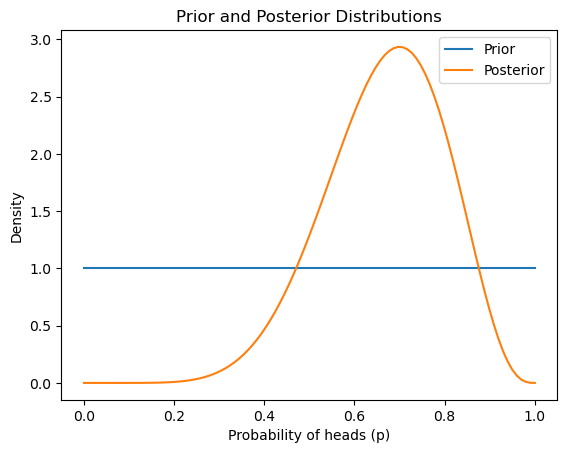

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the prior
prior = stats.beta(a=1, b=1)  # Uniform prior

# Define the observed data
n = 10
k = 7

# Update the prior with the observed data to get the posterior
posterior = stats.beta(a=k+1, b=n-k+1)

# Plot the prior and posterior
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, posterior.pdf(x), label='Posterior')
plt.xlabel('Probability of heads (p)')
plt.ylabel('Density')
plt.legend()
plt.title('Prior and Posterior Distributions')
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     9.596
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           0.000158
Time:                        14:28:47   Log-Likelihood:                 26.706
No. Observations:                 100   AIC:                            -47.41
Df Residuals:                      97   BIC:                            -39.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8646      0.191     25.503

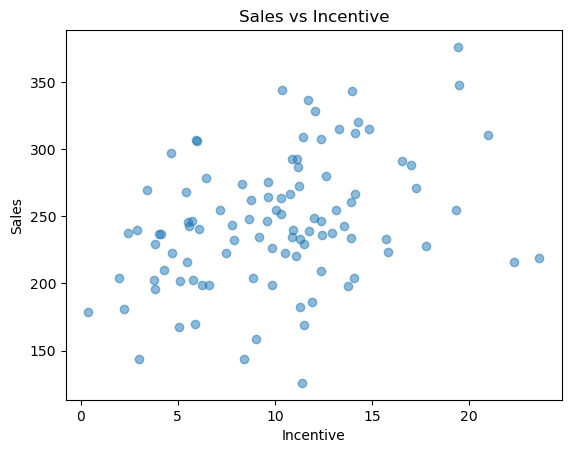

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample data
np.random.seed(42)
data = pd.DataFrame({
    'sales': np.random.normal(200, 50, 100),
    'incentive': np.random.normal(10, 5, 100),
    'seasonality': np.random.normal(1, 0.1, 100)
})

# Adding some correlation between sales and incentive
data['sales'] += data['incentive'] * 5

# Log-transform the data to linearize the relationship
data['log_sales'] = np.log(data['sales'])
data['log_incentive'] = np.log(data['incentive'])

# Define the independent variables (with a constant term for intercept)
X = sm.add_constant(data[['log_incentive', 'seasonality']])
y = data['log_sales']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Extract the coefficient for log_incentive (elasticity)
elasticity = model.params['log_incentive']
print(f'Sales Incentive Elasticity: {elasticity}')

# Visualize the relationship
plt.scatter(data['incentive'], data['sales'], alpha=0.5)
plt.xlabel('Incentive')
plt.ylabel('Sales')
plt.title('Sales vs Incentive')
plt.show()


In [25]:
import numpy as np
import pymc3 as pm

# Known parameters
price = 100  # Original price
discount_1 = 0.05  # 5% discount
discount_2 = 0.1  # 10% discount
profit_margin = 0.2  # 20% profit
cost = price * (1 - profit_margin)  # Cost of the product
D0 = 1000  # Demand at price $100 and 5% discount

# Bayesian model
with pm.Model() as model:
    # Prior for the slope (elasticity) of the demand curve
    slope = pm.Normal('slope', mu=0, sigma=10)

    # Linear demand curve (mu is the mean demand)
    mu = pm.Deterministic('mu', D0 - slope * (price * (1 - discount_1)))

    # Likelihood (Poisson distribution)
    demand = pm.Poisson('demand', mu=mu, observed=D0)

    # Sample from the posterior
    trace = pm.sample(10000, cores=2, chains=2)

# Extract the posterior samples for the slope
slope_samples = trace['slope']

# Calculate the profit at the new discount
new_price = price * (1 - discount_2)
new_demands = D0 - slope_samples * (new_price - price * (1 - discount_1))
new_revenues = new_price * new_demands
new_profits = new_revenues - cost * new_demands

# Calculate the probability of profit being greater than 20%
prob_profit_gt_20 = np.mean(new_profits > price * D0 * profit_margin)

print(f"Probability of profit being greater than 20% with 10% discount: {prob_profit_gt_20:.4f}")

ImportError: cannot import name 'local_bitwidth' from 'theano.configdefaults' (/Users/qingjunzhang/Anaconda3/anaconda3/lib/python3.11/site-packages/theano/configdefaults.py)

In [24]:
pip install theano

DEPRECATION: Loading egg at /Users/qingjunzhang/Anaconda3/anaconda3/lib/python3.11/site-packages/pymagnitude-0.1.143-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668110 sha256=a490b8eabaa37d9f730bf0fad6a63be094d45f52f3dec61bd26b62481ce042db
  Stored in directory: /Users/qingjunzhang/Library/Caches/pip/wheels/26/1f/2f/02d738022626461828148150c0354e712c4ad74f1a60f10933
Successfully built theano
Note: you may need to restart the kernel to use updated packages.


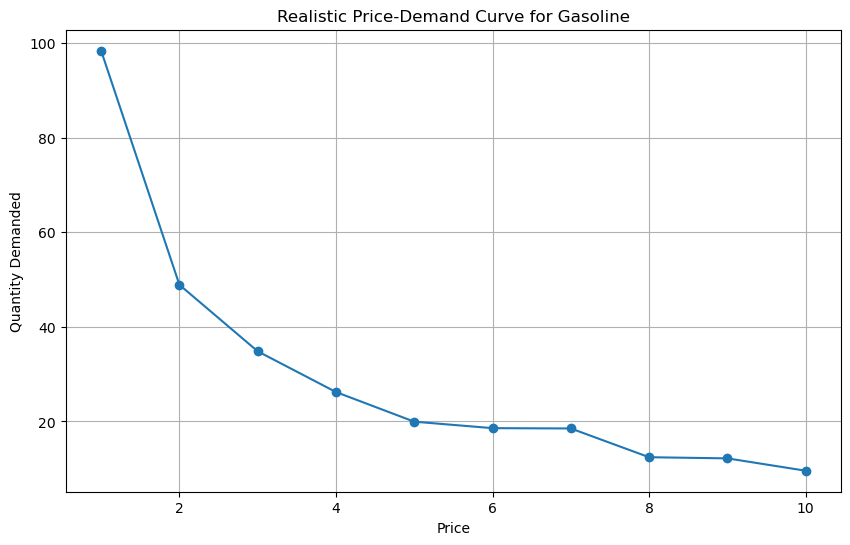

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical price and quantity demanded data with inelastic demand
prices = np.linspace(1, 10, 10)
quantities_demanded = 100 / prices + np.random.normal(0, 2, len(prices))

# Seasonal factor (e.g., higher demand during summer months)
seasonal_factor = np.array([1.1 if i % 12 in [5, 6, 7] else 1 for i in range(10)])

# Adjusted quantity demanded
adjusted_quantities_demanded = quantities_demanded * seasonal_factor

# Plot the price-demand curve
plt.figure(figsize=(10, 6))
plt.plot(prices, adjusted_quantities_demanded, marker='o')
plt.title('Realistic Price-Demand Curve for Gasoline')
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.grid(True)
plt.show()


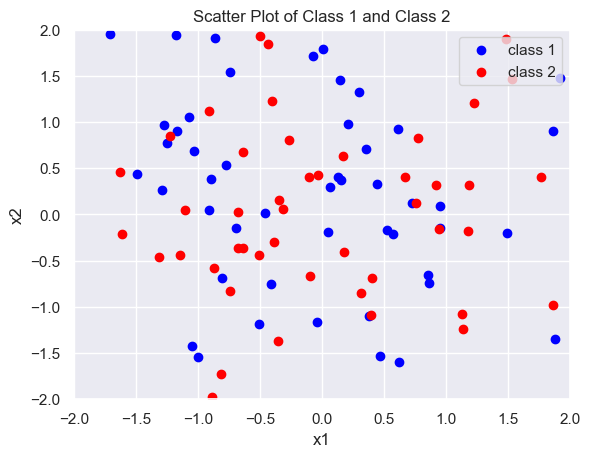

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.choice([0, 1], size=100)
title = "Scatter Plot of Class 1 and Class 2"

sns.set()

# Plot both classes: Class1->Blue, Class2->Red
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label="class 1")
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label="class 2")
plt.legend(loc='upper right')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title(title)
plt.show()


In [1]:
import torch
import torch.nn.functional as F

# Example input: batch size of 1, sequence length of 3, embedding dimension of 4
input_tensor = torch.tensor([[[1.0, 0.0, 1.0, 0.0],
                              [0.0, 1.0, 0.0, 1.0],
                              [1.0, 1.0, 1.0, 1.0]]])

# Define the dimensions
embedding_dim = 4
seq_length = 3

# Initialize the weight matrices for Q, K, and V
W_Q = torch.rand(embedding_dim, embedding_dim)
W_K = torch.rand(embedding_dim, embedding_dim)
W_V = torch.rand(embedding_dim, embedding_dim)

# Compute Q, K, and V
Q = torch.matmul(input_tensor, W_Q)
K = torch.matmul(input_tensor, W_K)
V = torch.matmul(input_tensor, W_V)

# Compute attention scores and apply softmax
attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(embedding_dim, dtype=torch.float32))
attention_weights = F.softmax(attention_scores, dim=-1)

# Compute the output as the weighted sum of values
output = torch.matmul(attention_weights, V)

print("Attention Weights:", attention_weights)
print("Output:", output)


Attention Weights: tensor([[[0.1357, 0.0986, 0.7657],
         [0.1623, 0.1772, 0.6605],
         [0.0404, 0.0321, 0.9275]]])
Output: tensor([[[1.4550, 2.3435, 0.9088, 2.1388],
         [1.3486, 2.1906, 0.8486, 2.0047],
         [1.5757, 2.5497, 0.9882, 2.3306]]])


In [3]:
def fibonacci(n, memo=None):
    if n <= 0:
        raise ValueError("n must be a positive integer")
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n == 1:
        return 0
    elif n == 2:
        return 1
    memo[n] = fibonacci(n - 1, memo) + fibonacci(n - 2, memo)
    return memo[n]

# Example usage:
n = -10
print(f"Fibonacci number F{n} is: {fibonacci(n)}")


ValueError: n must be a positive integer

In [1]:
"adlkjasdf"

'adlkjasdf'

In [1]:
import pandas as pd
df = pd.read_csv('true+false_v2.csv')

df.shape

(38645, 4)